# Seattle House Data

## Abstract

This tutorial shows how to fit a regression model using Python code. After examining the data, the first part fits a model using the *sklearn* package. Then, we use the *keras* package to fit an artificial  neural network.

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/OpenActTextDev/ActuarialRegression/blob/main/Notebooks/HousePriceRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>
 <br><br>


## Import and Describe the Data

We start by importing all of the packages needed for this tutorial. To show where they are required, we include them as comments.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
import random

from keras.models import Sequential
from keras.layers import Dense, Input
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from keras.layers import Dense, Dropout, Input
from keras.callbacks import EarlyStopping


## The Data

These data come  from a [Kaggle competition](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction).

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

We start by reading in and checking the data.

In [ ]:
#import pandas as pd
HouseData = pd.read_csv("https://raw.githubusercontent.com/OpenActTextDev/ActuarialRegression/refs/heads/main/CourseCSVData/kc_house_data.csv")
HouseData.head() # check the data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Let us look at the target (dependent) variable.

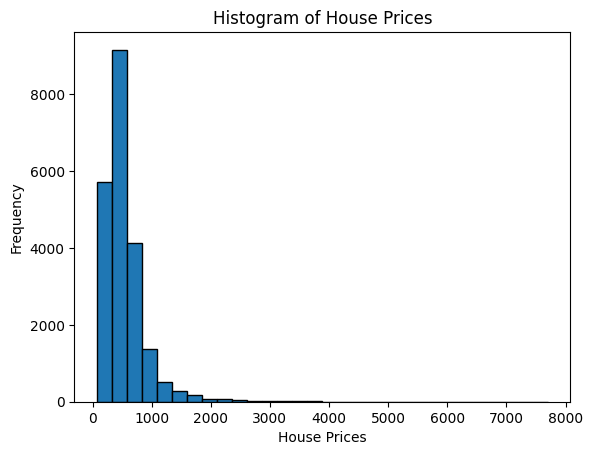

count    21613.000000
mean       540.088142
std        367.127196
min         75.000000
25%        321.950000
50%        450.000000
75%        645.000000
max       7700.000000
Name: price, dtype: float64


In [ ]:
# Define target, sales in thousands
y = HouseData['price']/1000

# Plot histogram
#import matplotlib.pyplot as plt
plt.hist(y, bins=30, edgecolor="black")
plt.xlabel("House Prices")
plt.ylabel("Frequency")
plt.title("Histogram of House Prices")
plt.show()
print(y.describe())



Now, for the features (covariates).

In [ ]:
# Define features (drop target + non-predictors like id, date)
X = HouseData.drop(columns=['price', 'id', 'date'])
print(X.describe())


           bedrooms     bathrooms   sqft_living      sqft_lot        floors  \
count  21613.000000  21613.000000  21613.000000  2.161300e+04  21613.000000   
mean       3.370842      2.114757   2079.899736  1.510697e+04      1.494309   
std        0.930062      0.770163    918.440897  4.142051e+04      0.539989   
min        0.000000      0.000000    290.000000  5.200000e+02      1.000000   
25%        3.000000      1.750000   1427.000000  5.040000e+03      1.000000   
50%        3.000000      2.250000   1910.000000  7.618000e+03      1.500000   
75%        4.000000      2.500000   2550.000000  1.068800e+04      2.000000   
max       33.000000      8.000000  13540.000000  1.651359e+06      3.500000   

         waterfront          view     condition         grade    sqft_above  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean       0.007542      0.234303      3.409430      7.656873   1788.390691   
std        0.086517      0.766318      0.650743    

We might be interested in geo-spatial features of the data.

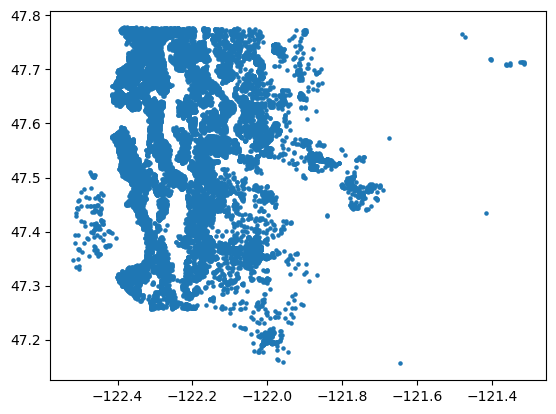

In [ ]:
plt.scatter(X["long"], X["lat"], s=5);

Here is how one can split the data into training, validation, and testing sub-samples.

In [ ]:
#from sklearn.model_selection import train_test_split
# Thanks https://datascience.stackexchange.com/a/15136
X_main, X_test, y_main, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1
)

# As 0.25 x 0.8 = 0.2
X_train, X_val, y_train, y_val = train_test_split(
    X_main, y_main, test_size=0.25, random_state=1
)


For presentation purposes, we use the simpler training and testing splits.

In [ ]:
#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16209, 18), (5404, 18), (16209,), (5404,))

# Regression Models

In [ ]:
#from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
# Create summary table
summary_df = pd.DataFrame({
    "Feature": ["Intercept"] + list(X.columns),
    "Coefficient": [model.intercept_] + list(model.coef_)
})

print(summary_df)

          Feature  Coefficient
0       Intercept  6690.324603
1        bedrooms   -35.766541
2       bathrooms    41.144279
3     sqft_living     0.110443
4        sqft_lot     0.000129
5          floors     6.689550
6      waterfront   582.960458
7            view    52.870942
8       condition    26.385649
9           grade    95.890445
10     sqft_above     0.070785
11  sqft_basement     0.039658
12       yr_built    -2.620223
13   yr_renovated     0.019813
14        zipcode    -0.582420
15            lat   602.748226
16           long  -214.729828
17  sqft_living15     0.021681
18     sqft_lot15    -0.000383


For consistency with other analyses, let us drop a few of the variables and show another way to fit the regression model.

In [ ]:
#  A shorter version of the features matrix
XTrainShort = X_train.drop(columns=['zipcode','lat', 'long', 'sqft_living15',
                               'sqft_lot15', 'sqft_basement','view', 'condition','grade'])
XTrainShortInt = sm.add_constant(XTrainShort)  # adds intercept term

#import statsmodels.api as sm
#from sklearn.metrics import r2_score
model = sm.OLS(y_train, XTrainShortInt).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                     2517.
Date:                Wed, 11 Jun 2025   Prob (F-statistic):               0.00
Time:                        14:00:35   Log-Likelihood:            -1.1133e+05
No. Observations:               16209   AIC:                         2.227e+05
Df Residuals:                   16199   BIC:                         2.228e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         6235.6063    159.012     39.215   

Another way to do the regression.

In [ ]:
lr = LinearRegression()
lr.fit(XTrainShortInt, y_train)
print(lr.coef_)

[ 0.00000000e+00 -6.02962627e+01  6.83540894e+01  2.76741207e-01
 -3.46251883e-04  4.64163644e+01  6.92124831e+02  1.68531128e-02
 -3.20304110e+00  1.31971195e-02]


Now, create a vectors of predictions; one for the training set, one for the test set. Then, compare the training set predictions to actual target outcomes.

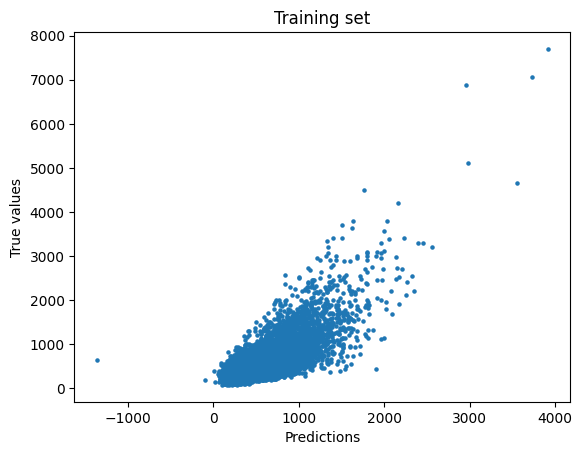

In [ ]:
ytrain_predict = lr.predict(XTrainShortInt)
XTestShort = X_test.drop(columns=['zipcode','lat', 'long', 'sqft_living15',
                               'sqft_lot15', 'sqft_basement','view', 'condition','grade'])
XTestShortInt = sm.add_constant(XTestShort)  # adds intercept term
ytest_predict = lr.predict(XTestShortInt)

plt.scatter(ytrain_predict, y_train, s=5)
plt.xlabel("Predictions")
plt.ylabel("True values")
plt.title("Training set");


Compare the test set predictions to actual target outcomes.

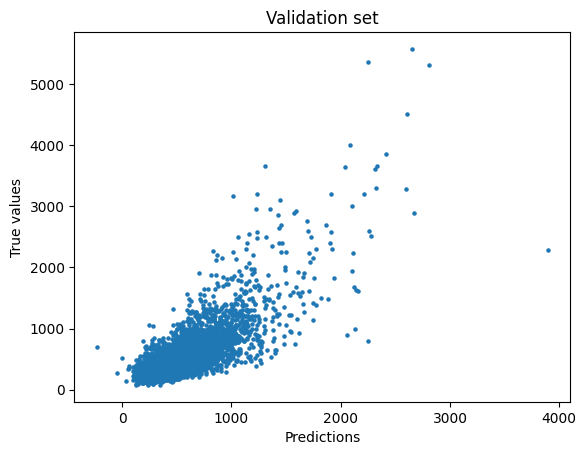

In [ ]:
plt.scatter(ytest_predict, y_test, s=5)
plt.xlabel("Predictions")
plt.ylabel("True values")
plt.title("Validation set");

Now let us compare predictions to actuals for both the training and test sets. Take the square root of the mse (mean squared error) so the units are in dollars (not squared dollars).

In [ ]:
#from sklearn.metrics import mean_squared_error as mse
print(np.sqrt(mse(ytrain_predict, y_train)))
print(np.sqrt(mse(ytest_predict, y_test)))


232.65580118752024
246.84386800716536


As anticipated, the fit is better for the training than the test set.

#  Neural Nets

We can start by specifying the model and taking a look at a summary of it.

This code mimics [Laub's First Keras Model](https://laub.au/DeepLearningForActuaries/Tabular-Data/deep-learning-keras.html#our-first-neural-network) (although with a different data set).

In [ ]:
#from keras.models import Sequential
#from keras.layers import Dense, Input
# import random

random.seed(2025)
model = Sequential(
    [Input((9,)),
     Dense(30, activation="leaky_relu"),
     Dense(1, activation="linear")]
)
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 30)             │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 331 (1.29 KB)

 Trainable params: 331 (1.29 KB)

 Non-trainable params: 0 (0.00 B)

This neural network architecture includes one hidden layer with 30 neurons and an output layer with 1 neuron.

*    While there is an activation function specified (`leaky_relu`) for the hidden layer, there is no activation function specified for the output layer.
*    In situations where there is no specification, the output layer assumes a linear activation.

We next **compile** the model. Compiling involves giving instructions on how we want the model to be trained.

*   The optimizer (`adam`) explains how the model should learn (how the model should update the weights).
*    The loss function (`mse` for mean squared error) states the objective that the model needs to optimize.

We run the model through the entire dataset five times with the updated weights before the training completes. The `hist.history()` function returns the calculate mse at each step.

*  The `%time` command computes and prints the amount of time spend on training.
*  By setting `verbose=False` we can avoid printing of intermediate results during training.
*  Setting `verbose=True` is useful when we want to observe how the neural network is training.



In [ ]:

model.compile("adam", "mse")
%time hist = model.fit(XTrainShort, y_train, epochs=5, validation_data=(XTestShort, y_test), verbose=True)

Epoch 1/5
507/507 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 2146410.0000 - val_loss: 92311.3672
Epoch 2/5
507/507 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 83367.7734 - val_loss: 83580.3828
Epoch 3/5
507/507 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 86394.5156 - val_loss: 79214.1250
Epoch 4/5
507/507 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 71375.7500 - val_loss: 81067.5781
Epoch 5/5
507/507 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 265318.8750 - val_loss: 79399.5938
CPU times: user 9.46 s, sys: 709 ms, total: 10.2 s
Wall time: 11.4 s


We can see the history of the square root of the mean square error.

In [ ]:
print(np.sqrt(hist.history["loss"]))

[785.25867553 288.96394942 316.00370844 273.01702671 466.56115623]


Now, we re-run the model with a longer training period, setting the number of epochs to 150. We do not need to see the output at each stage and so set `verbose=False`.

In [ ]:
model.compile("adam", "mse")
%time hist = model.fit(XTrainShort, y_train, epochs=150, validation_data=(XTestShort, y_test), verbose=False)
hist.history["loss"]

CPU times: user 3min 51s, sys: 17.2 s, total: 4min 8s
Wall time: 4min 52s


[125973.1484375,
 68223.34375,
 81322.484375,
 70770.890625,
 113317.7421875,
 63527.73046875,
 71179.21875,
 118481.84375,
 67641.84375,
 66881.5234375,
 87446.421875,
 74554.65625,
 97944.703125,
 311213.6875,
 63567.66015625,
 58505.4296875,
 74772.6328125,
 113842.890625,
 69321.8359375,
 63267.3203125,
 92964.7109375,
 64886.88671875,
 83090.40625,
 66182.0,
 87675.9609375,
 60957.71484375,
 68045.2109375,
 75466.703125,
 247469.359375,
 60366.55078125,
 56065.328125,
 56290.43359375,
 58029.48828125,
 56746.8984375,
 63342.4453125,
 69592.3828125,
 67215.8203125,
 197573.5,
 55492.78125,
 58306.09375,
 59724.58984375,
 130662.8125,
 57092.65625,
 115535.7890625,
 56539.59375,
 70710.7421875,
 55670.51953125,
 69524.8125,
 56785.87890625,
 62313.47265625,
 265630.03125,
 55700.26953125,
 59510.0234375,
 57189.390625,
 74060.4296875,
 61964.99609375,
 56100.390625,
 67444.109375,
 83174.96875,
 67331.90625,
 77803.6796875,
 63135.6640625,
 95829.890625,
 55312.30078125,
 56690.3867

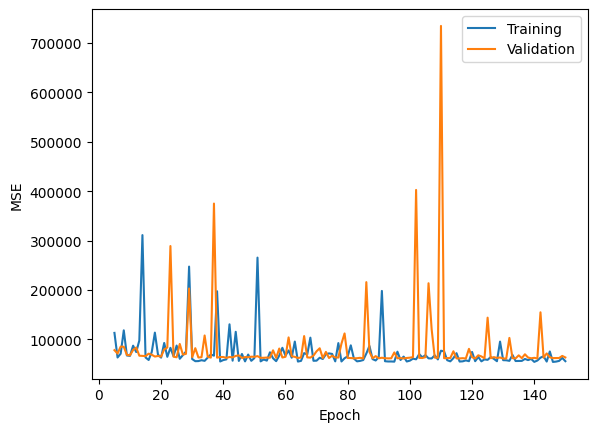

In [ ]:
plt.plot(range(5, 151), hist.history["loss"][4:])
plt.plot(range(5, 151), hist.history["val_loss"][4:])

plt.legend(["Training", "Validation"])
plt.xlabel("Epoch")
plt.ylabel("MSE");

In [ ]:
yNNtrain_predict= model.predict(XTrainShort, verbose=0)
print(pd.DataFrame(yNNtrain_predict) .describe())


                  0
count  16209.000000
mean     543.028625
std      282.728302
min     -846.085327
25%      388.217041
50%      475.091309
75%      588.810730
max     5778.640137


In [ ]:
#from sklearn.metrics import mean_squared_error as mse
print(np.sqrt(mse(yNNtrain_predict, y_train)))

234.11249846093276


In [ ]:
yNNtest_predict= model.predict(XTestShort, verbose=0)

print(pd.DataFrame(yNNtest_predict) .describe())
print(np.sqrt(mse(yNNtest_predict, y_test)))


                 0
count  5404.000000
mean    550.705627
std     301.773132
min   -1127.499390
25%     388.016136
50%     476.246521
75%     598.857117
max    3851.204590
252.24546670964932


Recall in the basic regression fit that the training root mse was 232.6558 and the test root mse was
246.8438. So, we need to do better!

**Rescale the Features**

Machine learning approaches like to have well behaved features. As part of our routine model fitting procedures, we will recale the features so that they are in the unit [0,1] range.

In [ ]:
#from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
scaler.fit(XTrainShort)

XTrainShort_sc = scaler.transform(XTrainShort)
XTestShort_sc  = scaler.transform(XTestShort)
print(pd.DataFrame(XTrainShort_sc) .describe())

                  0             1             2             3             4  \
count  1.620900e+04  1.620900e+04  1.620900e+04  1.620900e+04  1.620900e+04   
mean   1.876194e-16 -6.926137e-17  5.874065e-17  8.109717e-18 -1.806056e-16   
std    1.000031e+00  1.000031e+00  1.000031e+00  1.000031e+00  1.000031e+00   
min   -3.608735e+00 -2.761375e+00 -1.966164e+00 -3.695520e-01 -9.186256e-01   
25%   -3.941321e-01 -8.011497e-01 -7.092478e-01 -2.540579e-01 -9.186256e-01   
50%   -3.941321e-01  1.789627e-01 -1.800198e-01 -1.872187e-01  2.158665e-03   
75%    6.774021e-01  5.056668e-01  5.256175e-01 -1.091237e-01  9.229429e-01   
max    3.175190e+01  7.693158e+00  1.099992e+01  2.961857e+01  3.685296e+00   

                  5             6             7             8  
count  1.620900e+04  1.620900e+04  1.620900e+04  1.620900e+04  
mean  -4.734321e-17  1.393995e-16  3.186023e-15  3.506905e-18  
std    1.000031e+00  1.000031e+00  1.000031e+00  1.000031e+00  
min   -8.378769e-02 -1.818889e+0

In [ ]:
random.seed(2025)
model_sc = Sequential(
    [Dense(30, activation="leaky_relu"),
     Dense(1, activation="linear")]);


In [ ]:
model_sc.compile("adam", "mse")
%time hist_sc = model_sc.fit(XTrainShort_sc, y_train, epochs=150, validation_data=(XTestShort_sc, y_test), verbose=False)


In [ ]:
print(np.sqrt(hist_sc.history["loss"]))

[640.89512598 602.64759603 528.51608301 441.72538132 364.66315793
 310.28897821 277.98631374 261.5190152  253.41699208 248.30224306
 244.3129237  240.86952673 238.08214017 235.89451595 234.16240358
 232.75547959 231.66397911 230.74587787 230.04067235 229.43978138
 228.94359977 228.52592338 228.0876853  227.75750365 227.40160991
 227.08255829 226.80368197 226.50189707 226.20583996 225.90614409
 225.58853583 225.35563907 225.05207731 224.81977157 224.5628566
 224.3215988  224.14467635 223.91927954 223.70587903 223.48605242
 223.28329469 223.13137246 222.92010025 222.78036234 222.62125383
 222.45659689 222.30102585 222.146524   222.00307043 221.90605416
 221.74671467 221.65455598 221.48076772 221.397682   221.291954
 221.21837698 221.0731903  221.00069817 220.84301374 220.80353966
 220.70250055 220.58585878 220.49903451 220.42735481 220.33191404
 220.22263238 220.18029721 220.11625125 220.01108814 219.9431212
 219.82868863 219.81427708 219.7046046  219.66670421 219.60024049
 219.50102327 

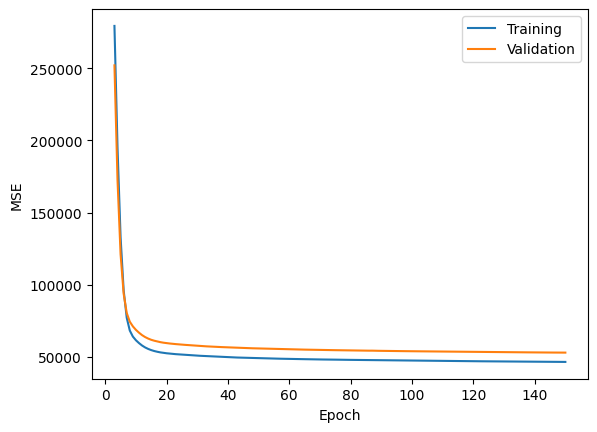

In [ ]:
plt.plot(range(3, 151), hist_sc.history["loss"][2:])
plt.plot(range(3, 151), hist_sc.history["val_loss"][2:])

plt.legend(["Training", "Validation"])
plt.xlabel("Epoch")
plt.ylabel("MSE");

In [ ]:
ysctrain_predict= model_sc.predict(XTrainShort_sc, verbose=0)
ysctest_predict = model_sc.predict(XTestShort_sc, verbose=0)

print(np.sqrt(mse(ysctrain_predict, y_train)))
print(np.sqrt(mse(ysctest_predict, y_test)))

215.856354233517
230.42445485354276


Much better. Now we have beat the standard regression model.

Now, just to experiment a bit, here is a more complex multi-layered (2) model. We include dropout and early stopping.

In [ ]:
#from keras.models import Sequential
#from keras.layers import Dense, Dropout, Input
#from keras.callbacks import EarlyStopping

random.seed(2025)
# Define the model
model_Drop = Sequential([
    Input(shape=(9,)),  # 9 input features
    Dense(64, activation='leaky_relu'),
    Dropout(0.3),  # Drop 30% of neurons
    Dense(30, activation='leaky_relu'),
    Dropout(0.3),
    Dense(1, activation='linear')  # for regression
])

# Compile the model
model_Drop.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Add early stopping
early_stop = EarlyStopping(
    monitor='val_loss',     # what to monitor
    patience=5,             # epochs to wait for improvement
    restore_best_weights=True  # use best weights seen
)

# Train the model
history_Drop = model_Drop.fit(
    XTrainShort_sc, y_train,
    validation_data=(XTestShort_sc, y_test),
    epochs=150,
    batch_size=32,
    callbacks=[early_stop],
    verbose=False
)



In [ ]:
print(np.sqrt(history_Drop.history["loss"]))

[503.53411938 272.67093263 254.9307504  250.71314691 248.43007851
 247.79704397 244.94426184 245.00243143 242.250129   244.69072476
 245.1864724  244.6793581  243.13114549 241.87540375 241.68130164
 241.10376883 244.88073468 237.70706434 237.36190887 241.41656329
 242.27712051 238.16179998 236.66659698 239.92765023 239.23428469
 238.66209933 239.96092618 236.2455026  239.56411427 240.76241206
 239.83524618 236.76576472 237.3922782  239.43730423 239.14073066
 238.23686677 237.39653174]


In [ ]:

ysctrain_predict= model_Drop.predict(XTrainShort_sc, verbose=0)
ysctest_predict = model_Drop.predict(XTestShort_sc, verbose=0)

print(np.sqrt(mse(ysctrain_predict, y_train)))
print(np.sqrt(mse(ysctest_predict, y_test)))



217.88519536635476
232.42059072916578


Not quite as good as the single layer model in terms of training and validation fit. However, at least it required on 37 epochs of training, due to early stopping....